In [4]:
import requests as rq
import pandas as pd
import json
import bs4
import re

import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
from sqlalchemy import create_engine

with open("C:/open_data_key.txt", 'r', encoding='utf-8') as f:
    data_key = f.readlines()
ServiceKey = data_key[0][:-1]
connection_string = data_key[1]

engine = create_engine(connection_string, encoding='utf-8', echo=False)

In [48]:
query = "select count(*) from pd1001 where delngde >= '20140201'"
dfs = pd.read_sql_query(query, engine)

In [49]:
dfs

,count(*)
0,0


In [7]:
query = "select * from pd1001 where delngde <= '20020202'"
dfs = pd.read_sql_query(query, engine)

In [8]:
dfs.shape

(10758, 45)

In [15]:
dfs[['aucsecode']].describe()

,aucsecode
count,10758
unique,4
top,1
freq,7265


In [23]:
dfs['aucsecode'].values().values

TypeError: 'numpy.ndarray' object is not callable

In [27]:
import matplotlib.pyplot as plt #Visulization
import seaborn as sns

In [29]:
sns.distplot(int(dfs['aucsecode']))

TypeError: cannot convert the series to <class 'int'>

In [44]:
df0 = dfs[['aucsecode']].convert_objects(convert_numeric=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [43]:
print(df0)

None


In [37]:
df0 = df0.fillna(0, inplace=True)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

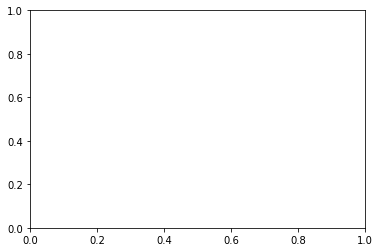

In [38]:
sns.distplot(df0)